# DATASET:-
# The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# IMPORT THE LIBRARIES

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

12 objects that of object types and rest are of float type

In [7]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


# as we can see in the colummns generation_gwh_2014	generation_gwh_2015	generation_gwh_2016	generation_gwh_2017	generation_gwh_2018, they have highly variance

In [10]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we can drop some of columns as they are full of null values

In [17]:
data = data.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_gwh_2014'],axis=1)

In [18]:
data.shape

(907, 19)

In [20]:
data.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [21]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


lets check the data of oject type and see which data is more required for us or not

<AxesSubplot:xlabel='country', ylabel='count'>

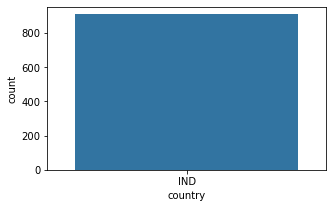

In [26]:
plt.figure(figsize=(5,3))
sns.countplot('country',data=data)

as there only one country present in the country columns..

<AxesSubplot:xlabel='country_long', ylabel='count'>

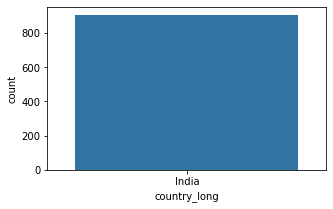

In [25]:
plt.figure(figsize=(5,3))
sns.countplot('country_long',data=data)

as the country_long column hve only one data i.e india which is also a object type

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

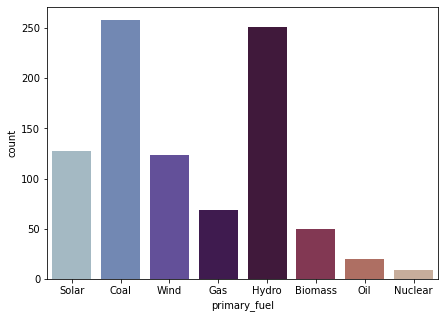

In [28]:
plt.figure(figsize=(7,5))
sns.countplot('primary_fuel',data=data,palette = 'twilight')

so clearly graph shows that the Coal and Hydro fuel are the energy source used in primary electricity generation or export

In [33]:
data['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

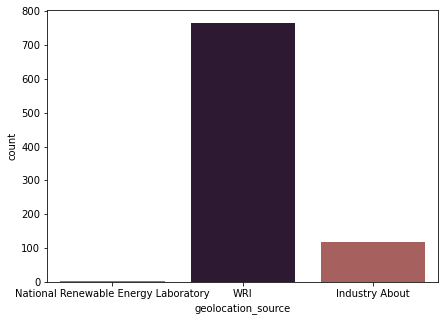

In [34]:
plt.figure(figsize=(7,5))
sns.countplot('geolocation_source',data=data,palette = 'twilight')

WRI attribute is the most highly goelocation soure 

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

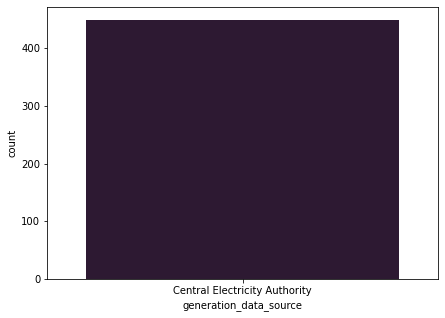

In [35]:
plt.figure(figsize=(7,5))
sns.countplot('generation_data_source',data=data,palette = 'twilight')

Central Electricity Authority  is the only authority who generate the information

so clean some more data 

In [36]:
data = data.drop(['country','country_long','owner','generation_data_source','gppd_idnr'],axis=1)
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,5916.370,6243.000000,5385.579736,7279.000000


In [38]:
data = data.drop(['url'],axis=1)

In [39]:
data.shape

(907, 13)

<AxesSubplot:xlabel='capacity_mw'>

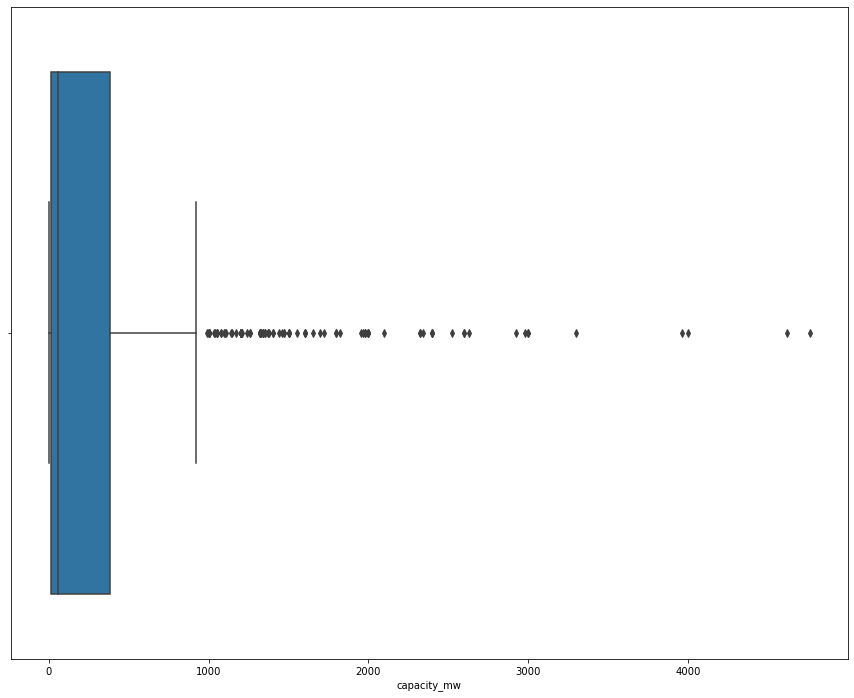

In [42]:
plt.figure(figsize=(15,12))
sns.boxplot(x='capacity_mw',data=data)

there are max no of data which looks like outliers but the data is the generating capacity of the plant

<AxesSubplot:xlabel='latitude'>

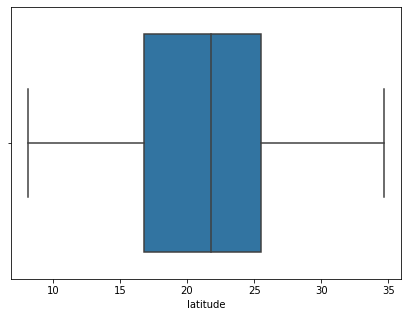

In [45]:
plt.figure(figsize=(7,5))
sns.boxplot(x='latitude',data=data)

latitudes data looks good and the max data are in the range btwn 16 to 27m

<AxesSubplot:xlabel='longitude'>

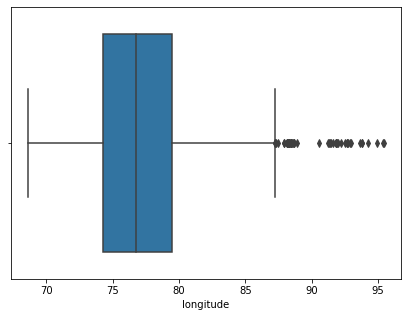

In [47]:
plt.figure(figsize=(7,5))
sns.boxplot(x='longitude',data=data)

migght some outliers present in the longitude data

<AxesSubplot:xlabel='commissioning_year'>

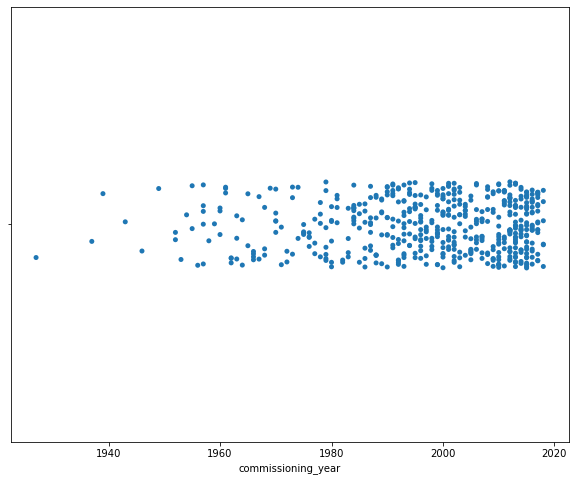

In [50]:
plt.figure(figsize=(10,8))
sns.stripplot(x='commissioning_year',data=data)

most no of plants operation in between 2000-2020 years

In [51]:
data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [52]:
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [53]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,30539.000000,30015.000000,35116.000000,35136.000000


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,5916.370,6243.000000,5385.579736,7279.000000


In [56]:
le = LabelEncoder()
var_mode = ['name','primary_fuel','source','geolocation_source',]

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [57]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,1,98.0,24.7663,74.6090,1,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,2,39.2,21.9038,69.3732,7,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,3,135.0,23.8712,91.3602,2,2004.0,22,2,2019.0,843.747,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,2015.0,22,2,2019.0,5916.370,6243.000000,5385.579736,7279.000000


In [63]:
data['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [58]:
data.isnull().sum()

name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source         0
year_of_capacity_data    388
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

now fill the nan

In [60]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())

In [62]:
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())

In [64]:
data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].mean())

In [65]:
data['year_of_capacity_data'] = data['year_of_capacity_data'].fillna(2019)

In [66]:
data['year_of_capacity_data'].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

In [70]:
data.isnull().sum()

name                       0
capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
commissioning_year         0
source                     0
geolocation_source         0
year_of_capacity_data      0
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

first we chk the correlation between thesw variables

In [71]:
data.corr()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.060240,-0.135247,0.020279,0.040753,-0.043569,-0.014640,0.045882,NaN,0.108726,0.096807,0.107317,0.096205
capacity_mw,0.060240,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,0.183419,NaN,0.844352,0.870620,0.886673,0.901918
latitude,-0.135247,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.178213,NaN,0.049134,0.041905,0.041711,0.041414
longitude,0.020279,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,0.244042,NaN,0.026404,0.054482,0.053761,0.050548
primary_fuel,0.040753,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,-0.420263,NaN,-0.393335,-0.408951,-0.421736,-0.421518
commissioning_year,-0.043569,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,0.000606,NaN,0.170363,0.193743,0.191367,0.193694
source,-0.014640,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,-0.491984,NaN,NaN,NaN,NaN,NaN
geolocation_source,0.045882,0.183419,-0.178213,0.244042,-0.420263,0.000606,-0.491984,1.000000,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2015,0.108726,0.844352,0.049134,0.026404,-0.393335,0.170363,NaN,NaN,NaN,1.000000,0.974918,0.940191,0.934371


<AxesSubplot:>

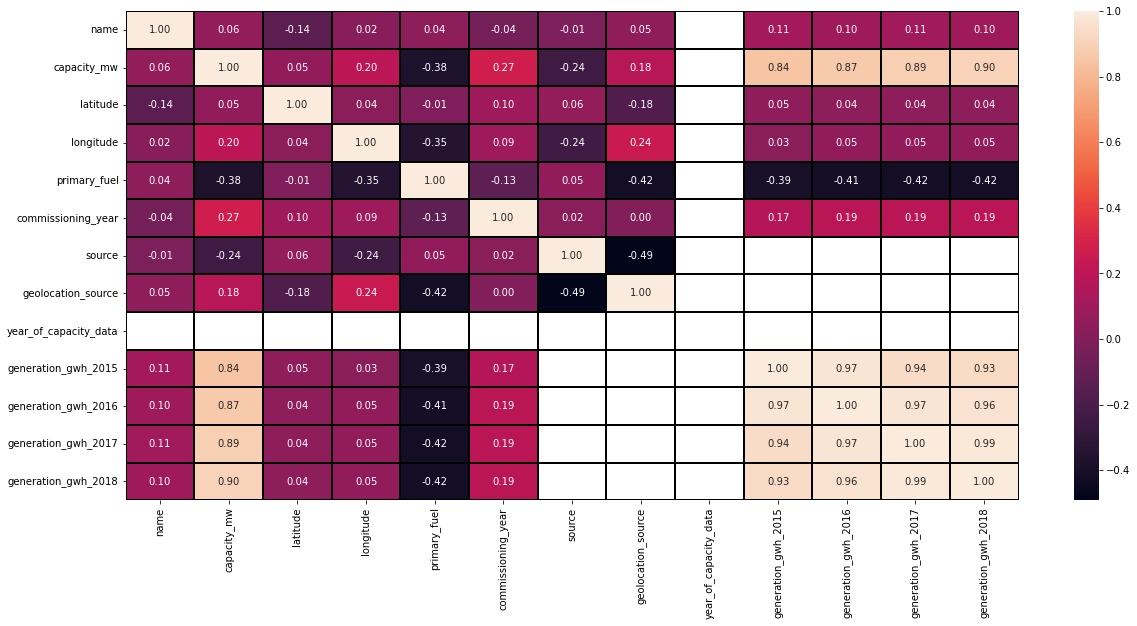

In [68]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(),annot= True,linewidth=0.1,linecolor='black',fmt="0.2f")

clearly there are some column (geneartion_gwh_2015,2016,2017,2018) are highly correlated so lets drop someone 

In [77]:
data = data.drop(['generation_gwh_2017','generation_gwh_2018'],axis=1)
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data
0,0,2.5,28.1839,73.2407,6,2011.000000,109,1,2019.0
1,1,98.0,24.7663,74.6090,1,1997.091082,174,2,2019.0
2,2,39.2,21.9038,69.3732,7,1997.091082,21,2,2019.0
3,3,135.0,23.8712,91.3602,2,2004.000000,22,2,2019.0
4,4,1800.0,21.9603,82.4091,1,2015.000000,22,2,2019.0


In [78]:
data.skew()

name                     0.000000
capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.399359
source                   1.827373
geolocation_source      -1.920302
year_of_capacity_data    0.000000
dtype: float64

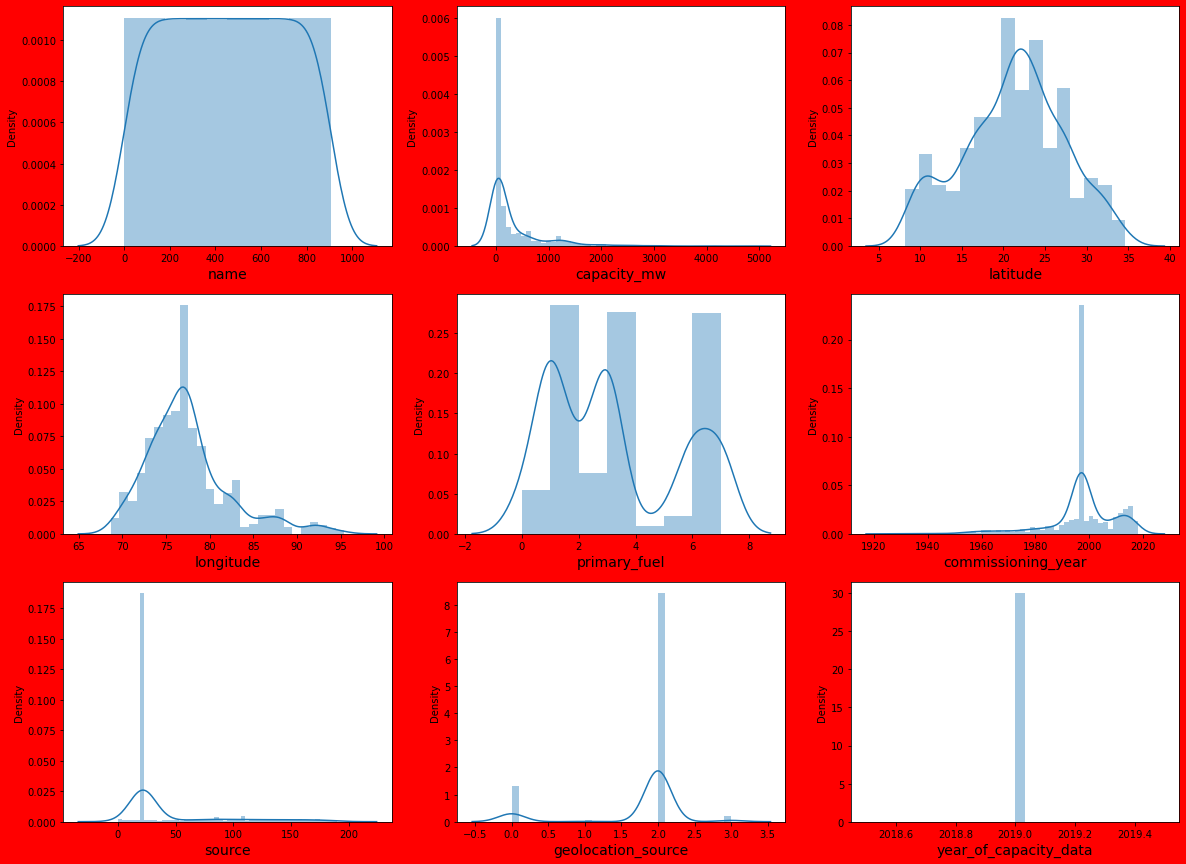

In [79]:
plt.figure(figsize = (20,15),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

data looks good cz we have to predict two dataa and very much of data is already is removed 

In [80]:
# seprating the columns into features and target

x= data.drop("primary_fuel",axis=1)
y= data["primary_fuel"]

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [83]:
x_scaled.shape[1]

8

In [84]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.026694,name
1,1.189796,capacity_mw
2,1.071235,latitude
3,1.115033,longitude
4,1.105909,commissioning_year
5,1.392504,source
6,1.403094,geolocation_source
7,NaN,year_of_capacity_data


so there is no multucoolinearity as the vif value is less than 5

In [86]:
# now data looks good for our model building

In [89]:
data['year_of_capacity_data'].isnull().sum()

0

# first uses classification ALGO FOR FINDING THE primary_fuel 

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [93]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 51.10132158590308
-------------------
[[ 0  0  0  2  0  0 11  1]
 [ 0 41  0 14  0  0  7  3]
 [ 0 10  0 10  0  0  0  0]
 [ 0  4  0 37  0  0  2 13]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  5  0  0  1  1]
 [ 0  6  0  1  0  0 21  2]
 [ 0  0  0 16  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      0.63      0.64        65
           2       0.00      0.00      0.00        20
           3       0.44      0.66      0.52        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.50      0.70      0.58        30
           7       0.46      0.52      0.49        33

    accuracy                           0.51       227
   macro avg       0.26      0.31      0.28       227
weighted avg       0.43      0.51      0.46       227



In [94]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :-",scr_lr.mean())

Cross Validation Score of logistic regression model is :- 0.5612288264221965


In [97]:
# now we trying with Decision tree classifier 

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 77.5330396475771
-------------------------
[[12  2  0  0  0  0  0  0]
 [ 1 46  6  6  4  2  0  0]
 [ 0  4  6  6  0  4  0  0]
 [ 0  6  1 46  2  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  3  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.77      0.71      0.74        65
           2       0.43      0.30      0.35        20
           3       0.75      0.82      0.79        56
           4       0.00      0.00      0.00         1
           5       0.30      0.38      0.33         8
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        33

    accuracy                           0.78       227
   macro avg       0.65      0.63      0.64       227
weighted avg       0.79      0.78      0.78       227



In [100]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.7839414728917491


In [101]:
# now check with random forest classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 80.61674008810573
[[12  2  0  0  0  0  0  0]
 [ 3 52  4  4  0  1  0  1]
 [ 0  6  6  6  0  2  0  0]
 [ 0  4  1 51  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  5  0  2  0  0]
 [ 0  3  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.75      0.80      0.78        65
           2       0.55      0.30      0.39        20
           3       0.77      0.91      0.84        56
           4       0.00      0.00      0.00         1
           5       0.40      0.25      0.31         8
           6       1.00      0.90      0.95        30
           7       0.97      1.00      0.99        33

    accuracy                           0.81       227
   macro avg       0.66      0.63      0.63       227
weighted avg       0.79      0.81      0.79       227



In [104]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.8445388865278367


In [105]:
# now with SVC algo

In [106]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 36.56387665198238
[[ 0  0  0 14  0  0  0  0]
 [ 0 31  0 34  0  0  0  0]
 [ 0  3  0 17  0  0  0  0]
 [ 0  4  0 52  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  1  0 29  0  0  0  0]
 [ 0  0  0 33  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.78      0.48      0.59        65
           2       0.00      0.00      0.00        20
           3       0.28      0.93      0.43        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        33

    accuracy                           0.37       227
   macro avg       0.13      0.18      0.13       227
weighted avg       0.29      0.37      0.27       227



In [107]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.41018760245279584


In [108]:
# so the difference between the cross val score and the accuracy score is  minimun for the DECISION TREE ALGO SO WE USED THIS algo


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
parameters = {'criterion':['gini','entropy'],'max_depth':range(2,6),'min_samples_leaf':range(2,6),'min_samples_split':range(2,6),}

clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [115]:
dts = DecisionTreeClassifier(criterion='entropy',max_depth= 5, min_samples_leaf=2, min_samples_split= 2)

In [116]:
dts.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [117]:
y_pred = dts.predict(x_test)

In [118]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[11,  3,  0,  0,  0,  0,  0,  0],
       [ 4, 49,  0, 10,  0,  2,  0,  0],
       [ 0,  8,  0,  9,  0,  3,  0,  0],
       [ 0,  5,  0, 51,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  5,  0,  2,  0,  0],
       [ 0,  3,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.70      0.75      0.73        65
           2       0.00      0.00      0.00        20
           3       0.68      0.91      0.78        56
           4       0.00      0.00      0.00         1
           5       0.29      0.25      0.27         8
           6       1.00      0.90      0.95        30
           7       1.00      1.00      1.00        33

    accuracy                           0.76       227
   macro avg       0.55      0.58      0.56       227
weighted avg       0.70      0.76      0.73       227



In [120]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.762114537444934


In [121]:
# so after tuning, its accuracy is  not increased so now our Dt model is ready to predict

In [122]:
# saving the model for later prediction
import pickle

In [124]:
filename = 'primary_fuel of GLOBAL PLANT.pickle'
pickle.dump(dt,open(filename,'wb'))

# hence my model is completed and ready to predict the primary_fuel of GLOBAL POWER PLANT

# now second prediction for capacity_mw. now our label = capacity_mw

#  Now uses regresssion ALGO FOR FINDING THE capacity_mw

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [127]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.39585298245289946}
At random state 0 the testing accuracy is {0.37155047632204063}


At random state 1 the training accuracy is {0.3874253657369813}
At random state 1 the testing accuracy is {0.3677367631682029}


At random state 2 the training accuracy is {0.4006022648022115}
At random state 2 the testing accuracy is {0.3491216101929787}


At random state 3 the training accuracy is {0.41631744179991026}
At random state 3 the testing accuracy is {0.2949733690564297}


At random state 4 the training accuracy is {0.3869629663439329}
At random state 4 the testing accuracy is {0.39429802900983424}


At random state 5 the training accuracy is {0.40022537208545983}
At random state 5 the testing accuracy is {0.3498012790710672}


At random state 6 the training accuracy is {0.38317392651856463}
At random state 6 the testing accuracy is {0.40911020904618944}


At random state 7 the training accuracy is {0.3786057609392782}
At random state 7 the test

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=64)

In [129]:
lr.fit(x_train,y_train)

LinearRegression()

In [130]:
pred_test = lr.predict(x_test)

In [132]:
print(r2_score(y_test,pred_test))

0.468282645743317


In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
cv_score = cross_val_score(lr,x,y,cv=7)
cv_mean = cv_score.mean()
cv_mean

0.3676132435121353

In [135]:
from sklearn import metrics

In [136]:
MAE = metrics.mean_absolute_error(y_test,pred_test)
MSE = metrics.mean_squared_error(y_test,pred_test)

In [137]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 1.3732830168771084
mean squared error: 2.955138713762074


In [138]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1.7190516902531099


In [139]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 2}


In [140]:
ls = Lasso(alpha=0.0001,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)


In [141]:
lss = r2_score(y_test,pred_ls)
lss

0.46825851006464314

In [142]:
cv_score = cross_val_score(ls,x,y,cv=7)
cv_mean = cv_score.mean()
cv_mean

0.36761282126960626

In [143]:
# WITH RANDOM FOREST

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rf = RandomForestRegressor(criterion="mse",max_features="auto",max_depth=3,min_samples_leaf=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

In [147]:
rfs = r2_score(y_test,pred_dec)
print('R2 Score:',rfs*100)
rf_score = cross_val_score(rf,x,y,cv=3)
rfc = rf_score.mean()
print("Cross val Score :",rfc*100)

R2 Score: 85.08185380669939
Cross val Score : 81.64452793797943


In [148]:
# WITH ADABOOST

In [149]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [150]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [151]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [152]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [153]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=47)

In [155]:
ada = AdaBoostRegressor(learning_rate=0.4,n_estimators=47)

In [156]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=47)

In [157]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.8220334332886585


In [158]:
cv_score = cross_val_score(ada,x,y,cv=7)
cv_mean = cv_score.mean()
cv_mean

0.8057648283379856

In [163]:
# to sav the model for later prediction with ada regressor algo

In [164]:
filename = 'capacity_mw of GLOBAL PLANT.pickle'
pickle.dump(ada,open(filename,'wb'))

# Hence my model is completed and saved to predict both labels